## Programming for Data Analysis - Project 1 ##

**Name: James McEneaney** <br/><br/>
**Course: Higher Diploma in Computing in Data Analytics, ATU Ireland** <br/><br/> 
**Semester: Semester 2 2023** <br/><br/>


***

### Introduction ###

This project sets out to simulate traffic levels between junctions 6 and 7 on the m50, based on an analysis of four weeks of traffic data taken during the month of October 2023. I will seek to establish how traffic levels are related to whether the day is a weekday or weekend, how traffic is distributed on average over a 24 hour period, and how the distribution of Northbound traffic compares with that of Southbound traffic. I also wish to investigate whether a relationship exists between local air temperature and the volume of traffic.

The main purpose of this project, however, is to create synthetic datasets of the variables we have selected, and to have them match as closely as possible the data as it exists in the real world.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/M50_looking_north_at_Castleknock_flyover.jpg/3264px-M50_looking_north_at_Castleknock_flyover.jpg" alt="Junction 6 M50 Northbound" width="600" height="400">



### Table of contents ###
* [Introduction](#introduction)
* [Background of Dataset](#background-of-dataset)
* [Pre-analysis](#pre-analysis)
* [Summary of variables in dataset](#summary-of-variables-in-dataset)
* [Distribution of traffic data](#distribution-of-traffic-data)
    * [Southbound traffic over one day (Monday Week 1)](#southbound-traffic-over-one-day-(monday-week-1))
    * [Average hourly Southbound traffic over each Monday](#average-hourly-southbound-traffic-over-each-monday)
    * [Average hourly Northbound traffic over each Monday](#average-hourly-northbound-traffic-over-each-monday)
    * [Average hourly Southbound and Northbound traffic for other weekdays](#average-hourly-southbound-and-northbound-traffic-for-other-weekdays)
    * [Average hourly Southbound and Northbound traffic for weekends](#average-hourly-southbound-and-northbound-traffic-for-weekends)
    * [Average busiest times and traffic volumes by day and direction](#average-busiest-times-and-traffic-volumes-by-day-and-direction)
    * [Standard deviations of hourly traffic data](#standard-deviations-of-hourly-traffic-data)
    * [Summary of traffic distribution](#summary-of-traffic-distribution)
* [Distribution of Air Temperature data](#distribution-of-air-temperature-data)
    * [All temperature data](#all-temperature-data)
    * [Temperature variation over 24 hours - examples of individual days](#temperature-variation-over-24-hours-examples-of-individual-days)
    * [Average temperature for each hour over 4 week sample period](#average-temperature-for-each-hour-over-4-week-sample-period)
    * [Summary of Air Temperature data distribution](#summary-of-air-temperature-data-distribution)
    * [Standard deviations of hourly air temperature data](#standard-deviations-of-hourly-air-temperature-data)
* [Correlation and Regression analyses](#correlation-and-regression-analyses)
    * [Correlations between Southbound and Northbound traffic](#correlations-between-southbound-and-northbound-traffic)
    * [Correlations between traffic levels and Air Temperature](#correlations-between-traffic-levels-and-air-temperature)
    * [Regression equation](#regression-equation)
    * [Side-by-side comparison of distributions](#side-by-side-comparison-of-distributions)
* [Synthesising datasets](#synthesising-datasets)
    * [Synthetic datasets of traffic data](#synthetic-datasets-of-traffic-data)
    * [Synthetic dataset of air temperature data](#synthetic-dataset-of-air-temperature-data)
    * [Correlation and regression analyses of synthetic datasets](#correlation-and-regression-analyses-of-synthetic-datasets)
* [Summary](#summary)
* [References](#references)

### Background of Dataset ###

To obtain traffic data, I downloaded the monthly volume report for this traffic for October 2023 from the Transport Infrastructure Ireland 
site https://trafficdata.tii.ie/calendar_alt.asp?sgid=XZOA8M4LR27P0HAO3_SRSB&spid=130DE8EB2080. I used the data for Southbound and Northbound traffic volumes for the 4-week period from Monday 2nd October to Sunday 29th October. Traffic here refers to all kinds of vehicles - cars, lorries, caravans, buses, motorbikes and vans, but, for the period analysed, cars made up roughly 77% of the total traffic, with vans accounting for a further 13%.
https://trafficdata.tii.ie/tfreport.asp?sgid=XzOA8m4lr27P0HaO3_srSB&spid=130DE8EB2080&reportdate=2023-10-02&enddate=2023-10-29&dimtype=2

To investigate the relationship of local air temperature with traffic levels, I used hourly data for air temperature for the nearby Phoenix Park weather station, for the period 2nd October to 29th October inclusive. https://data.gov.ie/dataset/phoenix-park-hourly-data 

I manually compiled the data I wanted to use from both source files into a CSV file which I saved into my repository for this project. I also created a column called "day_type" to allow me to split my sample by weekday and weekends, as I was curious to test how traffic levels were distributed according to that variable. In addition to this compiled CSV file, I have saved the raw source data files into my repository for reference.

This project is of interest to me as I currently travel on the m50 to work five days per month (Southbound in the morning, Northbound in the evening), and having a better understanding of how traffic levels are distributed on the m50 might help me to plan my commute better. I chose to analyse the area between junctions 6 and 7 as it strikes me as a busy area of the m50 during my commute. I am also curious to test what impact changes in a weather variable, such as air temperature, might have on other peoples' behavior, with regard to their decision to drive.

Before setting out my project, I should caveat my findings by emphasising that the distributions of traffic I measured are taken from October 2023 only and that the long run distributions for traffic levels are likely to deviate over time from those I measured (eg. due to holiday periods or events like very bad weather or the recent pandemic). Therefore, my simulated datasets for traffic levels are likely to deviate in the long run from the distributions that exist in the real world. Nevertheless, I feel this is an interesting dataset to practice.

### Pre-analysis ###
Firstly, I will import libraries which I will use to complete the project:

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss 

These were as follows:

* *Matplotlib* is a library used by Python to make plots and graphs. It requires NumPy to run. *Matplotlib.pyplot* is a collection functions which allows us to do different things to the plots we make, such as create them, add headings, change the colour scheme etc.

* *NumPy* (Numerical Python) is a package used in Python to carry out mathematical operations on numerical datatypes, such as integers and floating-point numbers. It creates multi-dimensional array objects which allow Python to carry out mathematical operations much more efficiently than would be the case in Python without NumPy. 

* *pandas* is built on top on NumPy and is a powerful and flexible Python package used for data analysis, especially of tabular data, such as the data in the .csv file used for this project. I used pandas to open my dataset. Pandas creates data-structures which allow data to be manipulated, with the most important being 1-dimensional data 'series' and 2-dimensional 'DataFrames' (the structure which is used here to manipulate the data from my CSV file). The DataFrame in pandas stores data as a two-dimensional structure where each piece of information has a row and column label.

* *Seaborn* is built on top of matplotlib. It enables us to make more appealing plots, utilising different styles. I will use it to create my regression plots.

* *Scipy.stats.* is a module containing many functions used for statistical calculations. I have used it here for its linregress() function to calculate a regression equation between traffic levels and air temperature.

Next, I will load up the dataset I will use for the project. This consists of real-world traffic and weather data amalgamated into a single CSV file:

In [86]:
df = pd.read_csv("J6_traffic_temp_hourly.csv")

# Here I am labelling the contents of the 'day' column as categorical variables (rather than object variables) 
# and ordering the contents from Monday to Sunday to override the default of alphabetical sorting of days which 
# I encountered when I tried to output the mean data for 7 am traffic on each day of the week using the groupby function.
# I decided to leave out that investigation but I will retain this ordering of categories in case I need it elsewhere
df['day'] = pd.Categorical(df['day'], categories=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], ordered=True)

print(df)

     week  hour  day day_type  southbound  northbound  temp
0       1     0  Mon  weekday         812         461  10.2
1       1     1  Mon  weekday         515         266   9.8
2       1     2  Mon  weekday         410         283   9.5
3       1     3  Mon  weekday         311         546   9.4
4       1     4  Mon  weekday         629        1018   9.4
..    ...   ...  ...      ...         ...         ...   ...
667     4    19  Sun  weekend        2889        2676   7.3
668     4    20  Sun  weekend        2172        2004   6.8
669     4    21  Sun  weekend        1490        1540   6.2
670     4    22  Sun  weekend        1582        1138   6.2
671     4    23  Sun  weekend        1192         845   6.1

[672 rows x 7 columns]


### Summary of variables in dataset ###
From above, we can see there are 672 rows of data; 24 rows for each day and 28 days worth of data.

The dataset I have compiled contains seven different variables; four of these relate to the measurement of time, two relate to the measurement of traffic, and one relates to the measurement of air temperature.

We can see the data-types for the different variables by using the .dtypes() function:



In [87]:
print(df.dtypes)

week             int64
hour             int64
day           category
day_type        object
southbound       int64
northbound       int64
temp           float64
dtype: object


- week: This is a **discrete integer** variable which I created to represent an interval of time and to make it easier to manipulate data pertaining to dates. It also allowed me to compare data for consecutive weeks with each other and to obtain averages across four weeks.
- hour: This is a **discrete integer** variable which I created to represent an interval of time. This made it easier to manipulate the data and represent it in plots, since I needed to fit 24 data points on the x-axis of many of my plots.
- day: This is a **categorical** variable, consisting of the seven days of the week and each day occuring with equal frequency. While working through the project, I decided to label this variable as "categorical" rather than "object", as I wanted to be able to order the output of certain functions involving the 'day' variable according to conventional ordering of days from Monday to Sunday; when categorised as "object", my output was ordering itself alphabetically.
- day_type: This is an **object** variable, taking either the value "weekday" or "weekend" with a ratio of 5:2, depending on the day of the week the data in the row relates to.
- southbound: This is a **discrete integer** variable representing the number of vehicles (ie. cars plus other vehicle types) recorded by the Transport Infrastructure Ireland website to have passed southbound through the four lanes of Junction 6 on the m50 Motorway in Dublin during the period Monday 2nd October to Sunday 29th October inclusive.
- northbound: This is a **discrete integer** variable like southbound, but captures the levels of traffic passing Northbound through the four lanes of Junction 6 on the m50 rather than Southbound.
- temp: This is a **floating point** variable representing the air temperature measured at Phoenix Park weather station on an hourly basis between Monday 2nd October inclusive. Temperature measured in degrees Celsius is an interval variable ie. one whose scale has an arbitrary zero point (in contrast to a ratio variable which has a zero-point that has a basis in the real world.)

The most interesting distributions here are those of the southbound traffic, northbound traffic and the distribution of aire temperature, and I will investigate the distributions of these variables below:

### Distribution of Southbound and Northbound traffic data ###
#### Southbound traffic over one day (Monday Week 1) ####

I will begin getting a sense of what this dataset represents by plotting the levels of southbound traffic over **one day** in the dataset: Monday of Week 1. 

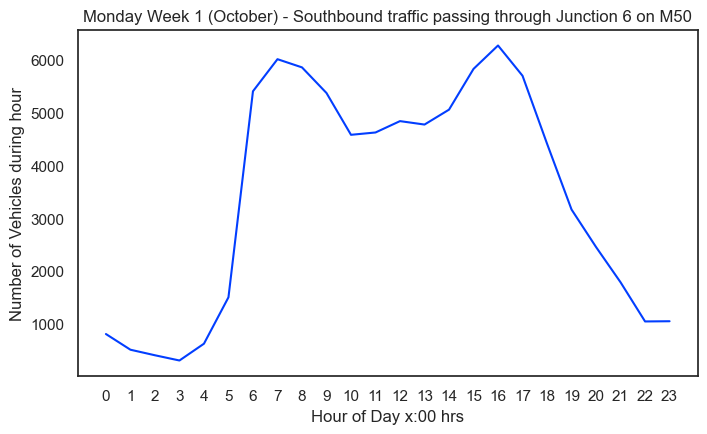

In [88]:
# Here I am filtering my main dataframe to create a smaller dataframe, containing only the 24 rows where the day is Monday
# and the week is Week 1.
monday_wk1 = df.loc[(df['day'] == 'Mon') & (df['week'] == 1)]

plt.figure(figsize=(8, 4.5))
plt.plot(monday_wk1['hour'], monday_wk1['southbound'])
plt.xlabel('Hour of Day x:00 hrs')
plt.xticks(np.arange(24))      # separate x-axis into intervals of 1 hour rather than default interval of 5 hours
plt.ylabel('Number of Vehicles during hour')
plt.title('Monday Week 1 (October) - Southbound traffic passing through Junction 6 on M50')
plt.savefig('monday_wk1_s.png')
plt.show()


The distribution appears as we might expect it to be for a Monday; the largest volumes of traffic occur between 6 and 9 am, and between 3 and 6 pm, when commuters are travelling to and from work and students are travelling to and from school.

To get a better sense of what Southbound traffic levels might be like on a typical Monday, we can create a plot of the average volume of traffic during each hour of Monday, calculated over the four Mondays of the sample dataset:

#### Average hourly Southbound traffic over each Monday ####

In [89]:
# First we create a dataframe consisting only of rows where the data in the 'day' column is 'Mon'.

monday = df.loc[df['day'] == 'Mon']

print(monday)

# Next we use the groupby() function on this 'monday' dataframe to seperate the data by the contents of the 'hour' column. 
# This creates 24 groups of data from the 'monday' dataframe, with each group having 4 rows corresponding to the 4 weeks sampled.
# We then use the .mean method on the 'southbound' column within each of these groups to calculate the mean value (over 4 weeks)
# for southbound traffic for each hour of each day.

# Note: The output of this function is a floating point variable. As the aim of this project is to simulate a dataset, rather than 
# produce true-to-reality plots of already existing datasets, I am content to not round these figure to whole numbers of vehicles 
# and instead leave the output of the mean() function as numerically accurate as possible for now.

mean_mon_s_hourly = monday.groupby('hour')['southbound'].mean()

print()
print('The average figure for southbound traffic passing through Junction 6 during each hour on a Monday is: ')
print(mean_mon_s_hourly)

     week  hour  day day_type  southbound  northbound  temp
0       1     0  Mon  weekday         812         461  10.2
1       1     1  Mon  weekday         515         266   9.8
2       1     2  Mon  weekday         410         283   9.5
3       1     3  Mon  weekday         311         546   9.4
4       1     4  Mon  weekday         629        1018   9.4
..    ...   ...  ...      ...         ...         ...   ...
523     4    19  Mon  weekday        3120        3266  10.9
524     4    20  Mon  weekday        2467        2094  10.9
525     4    21  Mon  weekday        1889        1475  11.0
526     4    22  Mon  weekday        1246        1066  11.2
527     4    23  Mon  weekday         842         753  10.9

[96 rows x 7 columns]

The average figure for southbound traffic passing through Junction 6 during each hour on a Monday is: 
hour
0      905.75
1      563.50
2      430.00
3      315.25
4      604.25
5     1558.75
6     5407.50
7     5915.75
8     5717.75
9     5250.50
10    46

Next, we can work out which hour of Monday has the highest average traffic level over the four weeks, and what that traffic level is. We can use the fact the indices of the output of mean_mon_s_hourly have the same numeric value as the hours which they relate to (eg. index [7] relates to the hour beginning at 7:00).

In [90]:
# here the idxmax() method allows us to pick out which row among the 24 rows of average hourly southbound traffic data
# has the highest figure, and the max() method tells us what that figure is

max_row_mon_s_hourly = mean_mon_s_hourly.idxmax()
max_value_mon_s_hourly = mean_mon_s_hourly.max()
print(f'The maximum average hourly figure for Southbound traffic on Mondays is {max_value_mon_s_hourly} and this occurs during the hour starting at {max_row_mon_s_hourly}:00')

The maximum average hourly figure for Southbound traffic on Mondays is 5915.75 and this occurs during the hour starting at 7:00


Next, we can plot this average hourly traffic for Southbound traffic measured over four consecutive Mondays in October:

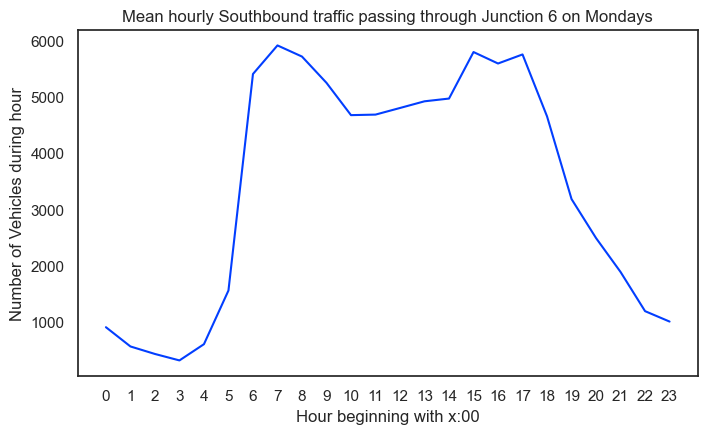

In [91]:
plt.figure(figsize=(8,4.5))   
plt.plot(mean_mon_s_hourly)
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))      # seperate x-axis into 24 intervals rather than 5
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly Southbound traffic passing through Junction 6 on Mondays')
plt.savefig('mean_mon_s_hourly.png')
plt.show()

#### Average hourly Northbound traffic over each Monday ####
Next, we can calculate the same kind of data for Northbound traffic over the four Mondays sampled for October:

In [92]:
mean_mon_n_hourly = monday.groupby('hour')['northbound'].mean()

print()
print('The average figure for Northbound traffic passing through Junction 6 during each hour on a Monday is: ')
print(mean_mon_n_hourly)

max_row_mon_n_hourly = mean_mon_n_hourly.idxmax()
max_value_mon_n_hourly = mean_mon_n_hourly.max()
print()
print()
print(f'The maximum average hourly figure for Northbound traffic on Mondays is {max_value_mon_n_hourly} and this occurs during the hour starting at {max_row_mon_n_hourly}:00.')


The average figure for Northbound traffic passing through Junction 6 during each hour on a Monday is: 
hour
0      479.50
1      279.25
2      281.75
3      545.25
4     1049.75
5     1592.75
6     3802.75
7     5749.50
8     5920.50
9     5293.00
10    4761.50
11    4703.75
12    4784.75
13    5042.00
14    5111.25
15    5979.25
16    6019.75
17    5959.00
18    5103.75
19    3293.50
20    2114.75
21    1495.50
22    1070.00
23     722.75
Name: northbound, dtype: float64


The maximum average hourly figure for Northbound traffic on Mondays is 6019.75 and this occurs during the hour starting at 16:00.


I will now create a plot of the average hourly Northbound traffic for Mondays, laying it over the plot for average hourly Southbound traffic to allow for an easier comparison:

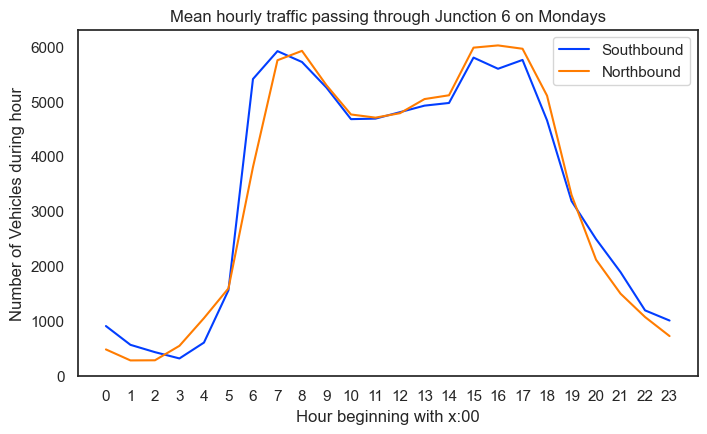

In [93]:
plt.figure(figsize=(8,4.5))
plt.plot(mean_mon_s_hourly, label = 'Southbound')
plt.plot(mean_mon_n_hourly, label = 'Northbound')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Mondays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.savefig('mean_mon_s_n.png')
plt.show()

This graph gives us a sense of which hours are the busiest and least busy on a Monday, and also show how similar traffic levels are in each direction during any given hour. 

#### Average hourly Southbound and Northbound traffic for other weekdays ####
To get a sense of how average traffic levels look for each other **weekday** we can plot similar graphs as the one above:

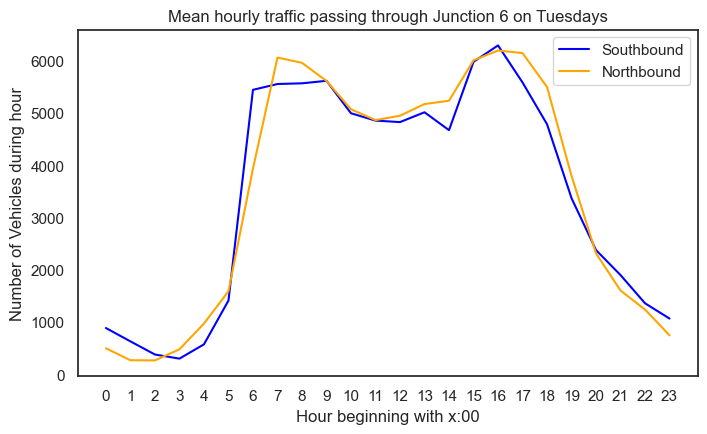

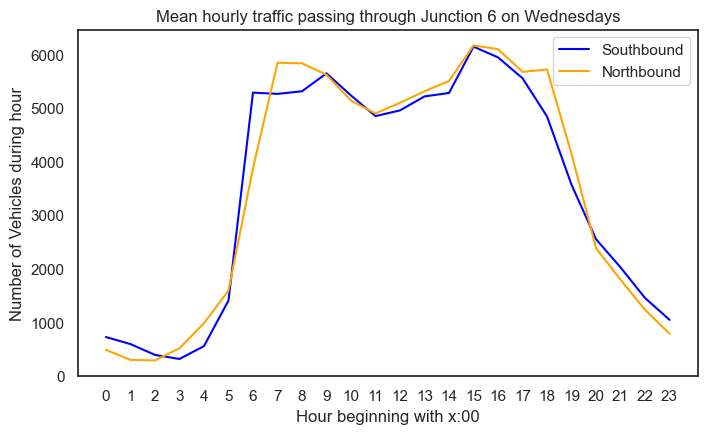

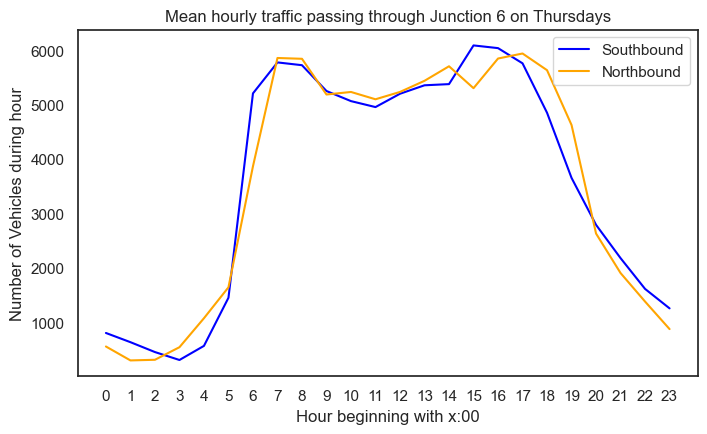

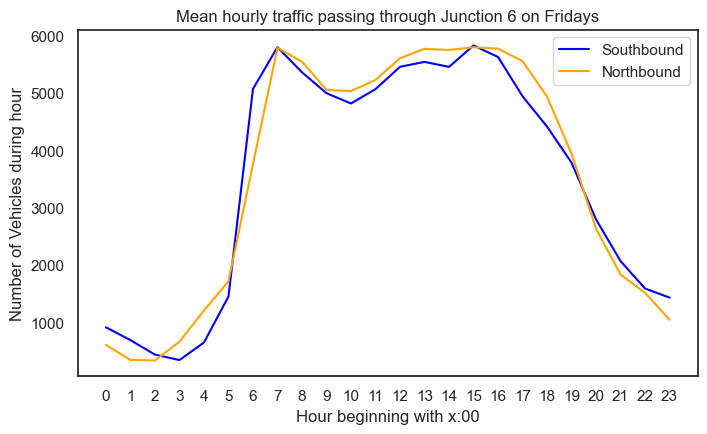

In [94]:
tuesday = df.loc[df['day'] == 'Tues']
wednesday = df.loc[df['day'] == 'Wed']
thursday = df.loc[df['day'] == 'Thurs']
friday = df.loc[df['day'] == 'Fri']

mean_tues_s_hourly = tuesday.groupby('hour')['southbound'].mean()
mean_wed_s_hourly = wednesday.groupby('hour')['southbound'].mean()
mean_thurs_s_hourly = thursday.groupby('hour')['southbound'].mean()
mean_fri_s_hourly = friday.groupby('hour')['southbound'].mean()

mean_tues_n_hourly = tuesday.groupby('hour')['northbound'].mean()
mean_wed_n_hourly = wednesday.groupby('hour')['northbound'].mean()
mean_thurs_n_hourly = thursday.groupby('hour')['northbound'].mean()
mean_fri_n_hourly = friday.groupby('hour')['northbound'].mean()


plt.figure(figsize=(8,4.5))
plt.plot(mean_tues_s_hourly, label = 'Southbound', color = 'blue')
plt.plot(mean_tues_n_hourly, label = 'Northbound', color = 'orange')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))      
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Tuesdays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.savefig('mean_tues_s_n.png')
plt.show()

plt.figure(figsize=(8,4.5))
plt.plot(mean_wed_s_hourly, label = 'Southbound', color = 'blue')
plt.plot(mean_wed_n_hourly, label = 'Northbound', color = 'orange')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Wednesdays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.savefig('mean_wed_s_n.png')
plt.show()

plt.figure(figsize=(8,4.5))
plt.plot(mean_thurs_s_hourly, label = 'Southbound', color = 'blue')
plt.plot(mean_thurs_n_hourly, label = 'Northbound', color = 'orange')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))    
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Thursdays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.savefig('mean_thurs_s_n.png')
plt.show()

plt.figure(figsize=(8,4.5))
plt.plot(mean_fri_s_hourly, label = 'Southbound', color = 'blue')
plt.plot(mean_fri_n_hourly, label = 'Northbound', color = 'orange')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))    
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Fridays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.savefig('mean_fri_s_n.png')
plt.show()


#### Average hourly Southbound and Northbound traffic for weekends ####
The distributions of hourly traffic for the two **weekend** days are as below:

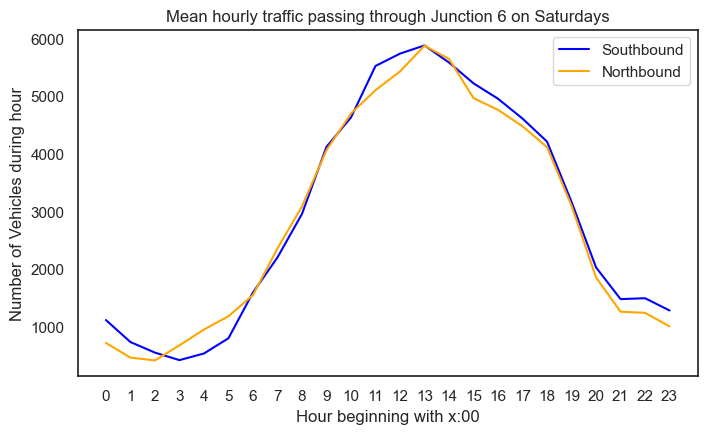

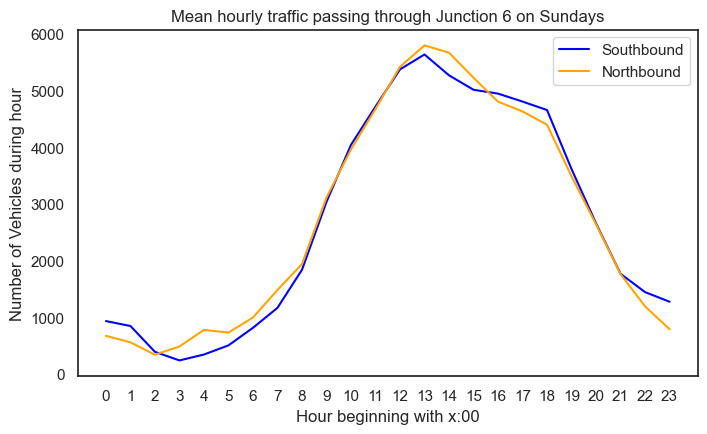

In [95]:
saturday = df.loc[df['day'] == 'Sat']
sunday = df.loc[df['day'] == 'Sun']

mean_sat_s_hourly = saturday.groupby('hour')['southbound'].mean()
mean_sun_s_hourly = sunday.groupby('hour')['southbound'].mean()

mean_sat_n_hourly = saturday.groupby('hour')['northbound'].mean()
mean_sun_n_hourly = sunday.groupby('hour')['northbound'].mean()


plt.figure(figsize=(8,4.5))
plt.plot(mean_sat_s_hourly, label = 'Southbound', color = 'blue')
plt.plot(mean_sat_n_hourly, label = 'Northbound', color = 'orange')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Saturdays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.savefig('mean_sat_s_n.png')
plt.show()

plt.figure(figsize=(8,4.5))
plt.plot(mean_sun_s_hourly, label = 'Southbound', color = 'blue')
plt.plot(mean_sun_n_hourly, label = 'Northbound', color = 'orange')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Sundays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.savefig('mean_sun_s_n.png')
plt.show()

#### Plots for overall average Weekday and Weekend traffic ###

hour
0      847.75
1      623.35
2      419.05
3      317.10
4      590.65
5     1456.40
6     5283.95
7     5663.20
8     5537.95
9     5353.05
10    4958.55
11    4883.55
12    5049.45
13    5211.30
14    5152.30
15    5969.25
16    5900.70
17    5520.65
18    4710.30
19    3512.60
20    2601.85
21    2012.65
22    1442.35
23    1162.15
Name: southbound, dtype: float64


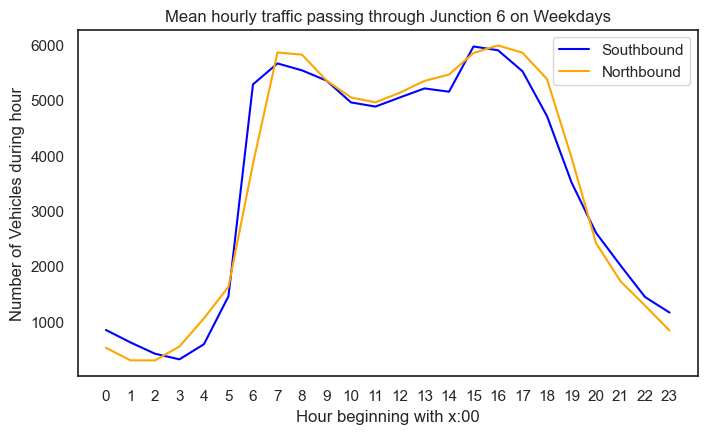

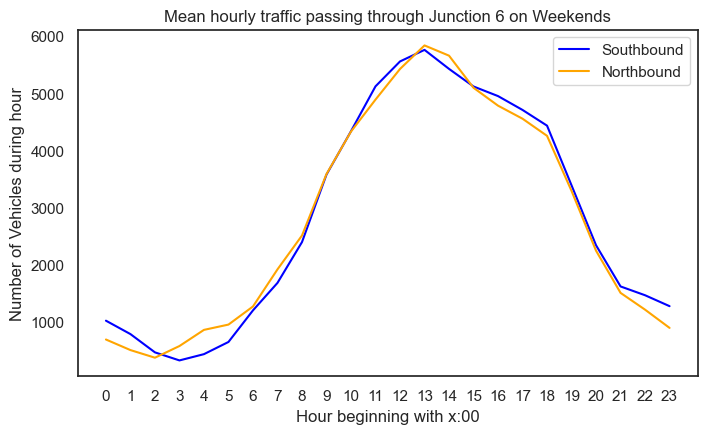

In [96]:
weekday = df.loc[df['day_type'] == 'weekday']
weekend = df.loc[df['day_type'] == 'weekend']

mean_weekday_s_hourly = weekday.groupby('hour')['southbound'].mean() 
mean_weekend_s_hourly = weekend.groupby('hour')['southbound'].mean()
mean_weekday_n_hourly = weekday.groupby('hour')['northbound'].mean() 
mean_weekend_n_hourly = weekend.groupby('hour')['northbound'].mean() 

print(mean_weekday_s_hourly)

plt.figure(figsize=(8,4.5))
plt.plot(mean_weekday_s_hourly, label = 'Southbound', color = 'blue')
plt.plot(mean_weekday_n_hourly, label = 'Northbound', color = 'orange')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Weekdays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.savefig('mean_weekday_s_n.png')
plt.show()

plt.figure(figsize=(8,4.5))
plt.plot(mean_weekend_s_hourly, label = 'Southbound', color = 'blue')
plt.plot(mean_weekend_n_hourly, label = 'Northbound', color = 'orange')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Weekends')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.savefig('mean_weekend_s_n.png')
plt.show()



#### Average busiest times and traffic volumes by day and direction ####
As we did above for Monday's hourly data, we can get a sense of which hour is the busiest on average for each other day using the .max and .idxmax methods on the mean hourly data:

In [97]:
max_row_tues_s_hourly = mean_tues_s_hourly.idxmax()
max_value_tues_s_hourly = mean_tues_s_hourly.max()

max_row_tues_n_hourly = mean_tues_n_hourly.idxmax()
max_value_tues_n_hourly = mean_tues_n_hourly.max()

max_row_wed_s_hourly = mean_wed_s_hourly.idxmax()
max_value_wed_s_hourly = mean_wed_s_hourly.max()

max_row_wed_n_hourly = mean_wed_n_hourly.idxmax()
max_value_wed_n_hourly = mean_wed_n_hourly.max()

max_row_thurs_s_hourly = mean_thurs_s_hourly.idxmax()
max_value_thurs_s_hourly = mean_thurs_s_hourly.max()

max_row_thurs_n_hourly = mean_thurs_n_hourly.idxmax()
max_value_thurs_n_hourly = mean_thurs_n_hourly.max()

max_row_fri_s_hourly = mean_fri_s_hourly.idxmax()
max_value_fri_s_hourly = mean_fri_s_hourly.max()

max_row_fri_n_hourly = mean_fri_n_hourly.idxmax()
max_value_fri_n_hourly = mean_fri_n_hourly.max()

max_row_sat_s_hourly = mean_sat_s_hourly.idxmax()
max_value_sat_s_hourly = mean_sat_s_hourly.max()

max_row_sat_n_hourly = mean_sat_n_hourly.idxmax()
max_value_sat_n_hourly = mean_sat_n_hourly.max()

max_row_sun_s_hourly = mean_sun_s_hourly.idxmax()
max_value_sun_s_hourly = mean_sun_s_hourly.max()

max_row_sun_n_hourly = mean_sun_n_hourly.idxmax()
max_value_sun_n_hourly = mean_sun_n_hourly.max()

print(f'The maximum average hourly figure for Southbound traffic for each day and the hour this is expected to occur are as below:')
print(f'Tuesday:   {max_value_tues_s_hourly} at  {max_row_tues_s_hourly}:00')
print(f'Wednesday: {max_value_wed_s_hourly} at  {max_row_wed_s_hourly}:00')
print(f'Thursday:  {max_value_thurs_s_hourly} at  {max_row_thurs_s_hourly}:00')
print(f'Friday:    {max_value_fri_s_hourly}  at  {max_row_fri_s_hourly}:00')
print(f'Saturday:  {max_value_sat_s_hourly} at  {max_row_sat_s_hourly}:00')
print(f'Sunday:    {max_value_sun_s_hourly}  at  {max_row_sun_s_hourly}:00')

print()

print(f'The maximum average hourly figure for Northbound traffic for each day and the hour this is expected to occur are as below:')
print(f'Tuesday:   {max_value_tues_n_hourly}  at  {max_row_tues_n_hourly}:00')
print(f'Wednesday: {max_value_wed_n_hourly} at  {max_row_wed_n_hourly}:00')
print(f'Thursday:  {max_value_thurs_n_hourly} at  {max_row_thurs_n_hourly}:00')
print(f'Friday:    {max_value_fri_n_hourly} at  {max_row_fri_n_hourly}:00')
print(f'Saturday:  {max_value_sat_n_hourly}  at  {max_row_sat_n_hourly}:00')
print(f'Sunday:    {max_value_sun_n_hourly}  at  {max_row_sun_n_hourly}:00')


The maximum average hourly figure for Southbound traffic for each day and the hour this is expected to occur are as below:
Tuesday:   6293.75 at  16:00
Wednesday: 6143.25 at  15:00
Thursday:  6092.75 at  15:00
Friday:    5832.5  at  15:00
Saturday:  5881.75 at  13:00
Sunday:    5639.0  at  13:00

The maximum average hourly figure for Northbound traffic for each day and the hour this is expected to occur are as below:
Tuesday:   6196.5  at  16:00
Wednesday: 6165.75 at  15:00
Thursday:  5944.25 at  17:00
Friday:    5800.75 at  15:00
Saturday:  5877.5  at  13:00
Sunday:    5799.0  at  13:00


#### Standard deviations of hourly traffic data ####

We can calculate the extent to which traffic data varied for each hour of the week, measured relative to the mean figures for each hour of the week. This generates floating point numbers which I will not round up, as I want the figures for standard deviation to be as accurate as possible when using them to simulate my datasets further on. To begin, I will calculate the standard deviations for Monday's hourly Southbound traffic.

In [98]:
std_mon_s_hourly = monday.groupby('hour')['southbound'].std()
print(std_mon_s_hourly)

hour
0       71.121375
1       53.319790
2       34.756294
3       15.585784
4       25.184321
5       51.292462
6       39.110953
7       92.791433
8      229.039116
9      298.221953
10     192.144694
11      83.969737
12      80.967071
13     113.485315
14      79.086451
15      40.816663
16    1099.581852
17     304.169224
18     446.802995
19      60.785826
20      32.263240
21      79.629873
22      97.984267
23     109.462322
Name: southbound, dtype: float64


The large figure for standard deviation for 16:00 can be put down to unusually low traffic figures for that hour on Monday of Week 3 due to incidents on the M50 (see link https://www.dublinlive.ie/news/dublin-news/dublin-traffic-live-christchurch-incident-27919940).

Similar statistics for standard deviation can be calculated for hourly Southbound and Northbound traffic for each of the seven days of the week, over the four weeks studied; the code for calculating these (without printing) is as below:

In [99]:
std_tues_s_hourly = tuesday.groupby('hour')['southbound'].std()
std_wed_s_hourly = wednesday.groupby('hour')['southbound'].std()
std_thurs_s_hourly = thursday.groupby('hour')['southbound'].std()
std_fri_s_hourly = friday.groupby('hour')['southbound'].std()
std_sat_s_hourly = saturday.groupby('hour')['southbound'].std()
std_sun_s_hourly = sunday.groupby('hour')['southbound'].std()

std_mon_n_hourly = monday.groupby('hour')['northbound'].std()
std_tues_n_hourly = tuesday.groupby('hour')['northbound'].std()
std_wed_n_hourly = wednesday.groupby('hour')['northbound'].std()
std_thurs_n_hourly = thursday.groupby('hour')['northbound'].std()
std_fri_n_hourly = friday.groupby('hour')['northbound'].std()
std_sat_n_hourly = saturday.groupby('hour')['northbound'].std()
std_sun_n_hourly = sunday.groupby('hour')['northbound'].std()

We can also calculate the standard deviations for weekday and weekend traffic levels:

In [100]:
std_weekday_s_hourly = weekday.groupby('hour')['southbound'].std()
std_weekday_n_hourly = weekday.groupby('hour')['northbound'].std()

std_weekend_s_hourly = weekend.groupby('hour')['southbound'].std()
std_weekend_n_hourly = weekend.groupby('hour')['northbound'].std()

#### Summary of traffic distribution ####
We can see that at the broadest level of description, traffic in both directions during all five weekdays follows a roughly similar distribution: a first peak period between 6 am and 10 am, followed by a second peak period between 2 pm and 7 pm. 

Bearing in mind that the hours with the busiest traffic levels for Monday are 7:00 for Southbound (level is 5915.75 ) and 16:00 for Northbound (level is 6019.75), we can see that, in general:
- on weekdays, traffic levels peak between 3 and 5 pm, and peak traffic levels are slightly higher earlier in the week than later.
- on weekends, traffic levels peak at slightly lower levels than during the working week.

On Mondays, the busiest hour is between 7 and 8 am; perhaps this can be explained by additional people travelling back to Dublin for work and college on a Monday morning after having spent the weekend further away.

For weekends, we find a very different distribution than that found for weekdays; traffic on both days peaks during the hour of 13:00, which resonates with my past experiences of travelling to Blanchardstown shopping centre at this time. However, on Sunday evening we see a steadier fall off in the second half of the day; my guess is that this is due to people returning to their accomodation in Dublin following the weekend spent down the country etc.

When I create my simulated dataset later based on this dataset, I will create seperate data for weekdays and weekends, since values are distributed differently on these types of days.

### Distribution of Air Temperature data ###

#### All temperature data ####
We can create a plot of all temperature data; unfortunately, I haven't found a way to prevent the plot returning to zero and bringing 27 straight lines across the plot - see below. If we ignore these lines, however, we can see the general rise-and-fall pattern of temperatures on a daily basis.

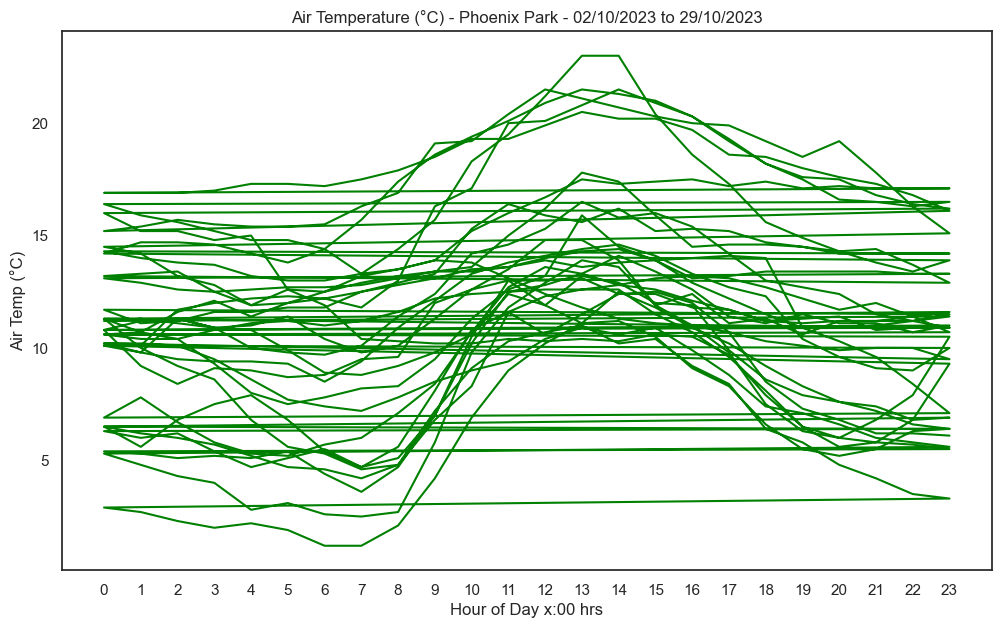

In [101]:
plt.figure(figsize=(12, 7))
plt.plot(df['hour'], df['temp'], color = 'green')
plt.xlabel('Hour of Day x:00 hrs')
plt.xticks(np.arange(24))
plt.ylabel('Air Temp (°C)')
plt.title('Air Temperature (°C) - Phoenix Park - 02/10/2023 to 29/10/2023')
plt.savefig('all_air_temp.png')
plt.show()


#### Temperature variation over 24 hours - examples of individual days ####
To create some cleaner plots, we can plot air temperature for Monday of Week 2, Wednesday of Week 3 and Saturday of Week 4; this gives us a sense of what somewhat randomly selected daily air temperature data can look like. I have plotted the data on separate graphs as I found it difficult to create a y-axis to capture the full temperature range.

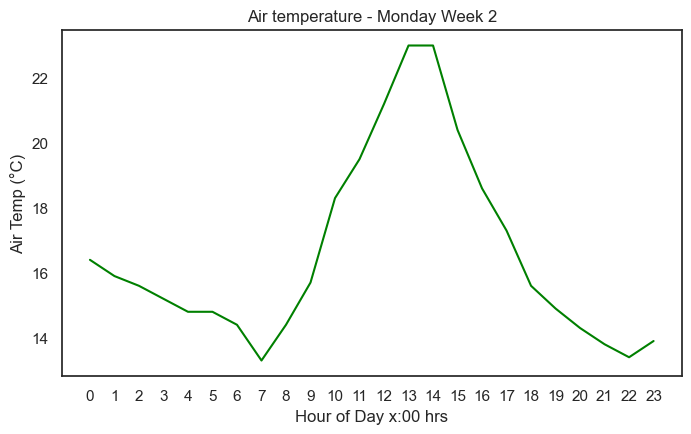

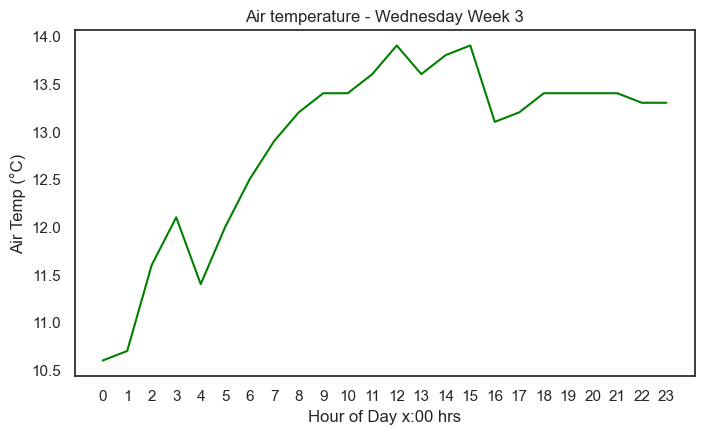

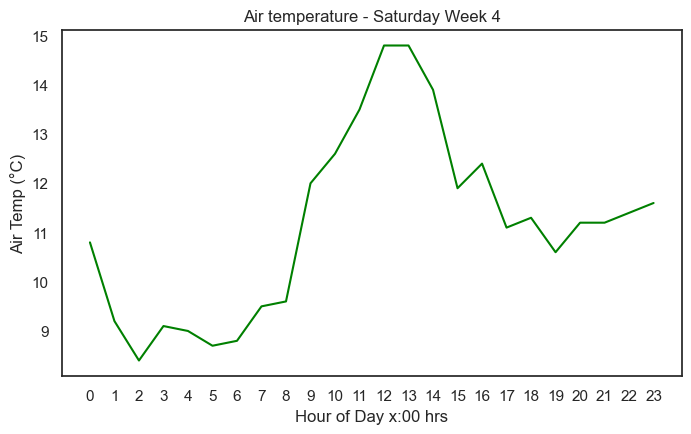

In [102]:
monday_wk2 = df.loc[(df['day'] == 'Mon') & (df['week'] == 2)]
wednesday_wk3 = df.loc[(df['day'] == 'Wed') & (df['week'] == 3)]
saturday_wk4 = df.loc[(df['day'] == 'Sat') & (df['week'] == 4)]

plt.figure(figsize=(8, 4.5))
plt.plot(monday_wk2['hour'], monday_wk2['temp'], label = "Mon week 2 temp", color = 'green')
plt.xlabel('Hour of Day x:00 hrs')
plt.xticks(np.arange(24))
plt.ylabel('Air Temp (°C)')
plt.title('Air temperature - Monday Week 2')
plt.savefig('temp_mon_wk2.png')
plt.show()

plt.figure(figsize=(8, 4.5))
plt.plot(wednesday_wk3['hour'], wednesday_wk3['temp'], label = "Wed week 3 temp", color = 'green')
plt.xlabel('Hour of Day x:00 hrs')
plt.xticks(np.arange(24))
plt.ylabel('Air Temp (°C)')
plt.title('Air temperature - Wednesday Week 3')
plt.savefig('temp_wed_wk3.png')
plt.show()

plt.figure(figsize=(8, 4.5))
plt.plot(saturday_wk4['hour'], saturday_wk4['temp'], label = "Sat week 2 temp", color = 'green')
plt.xlabel('Hour of Day x:00 hrs')
plt.xticks(np.arange(24))
plt.ylabel('Air Temp (°C)')
plt.title('Air temperature - Saturday Week 4')
plt.savefig('temp_sat_wk4.png')
plt.show()


#### Average temperature for each hour over 4 week sample period ####
It seems reasonable to me to assume that the air-temperature during a given hour of the day should be uncorrelated with the name of day, since day names are social construct created by human beings and don't have innate characteristic links to the weather, in and of themselves. Whatever the case may be with a short term sample such as the one I am analysing (where correlations could be found which are coincidental), over the long run, the incidence of certain air temperature levels during certain hours of the day should even out across the seven days of the week as so as to be uncorrelated with them. Therefore, I will not analyse temperature with regard to day of the week.

A more interesting investigation might be to analyse what the average air temperature is during each hour of the day during a certain month of the year. Here, I will calculate the average air temperature for each hour over the 4 week sample of October 2023 and then plot this data; I will use the groupby function again to do this:



In [103]:
mean_hourly_temp = df.groupby('hour')['temp'].mean()

print(mean_hourly_temp)

hour
0     10.803571
1     10.550000
2     10.525000
3     10.332143
4      9.978571
5      9.771429
6      9.553571
7      9.567857
8     10.167857
9     11.489286
10    12.878571
11    13.989286
12    14.403571
13    14.896429
14    14.796429
15    14.275000
16    13.685714
17    12.957143
18    12.092857
19    11.389286
20    11.078571
21    10.846429
22    10.660714
23    10.710714
Name: temp, dtype: float64


This list of average air temperatures can be plotted:

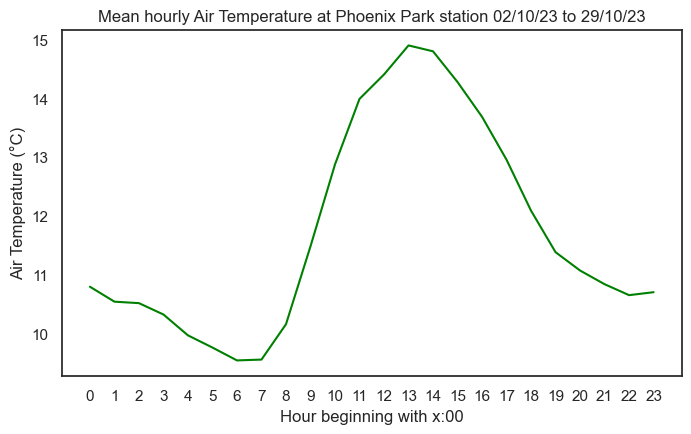

In [104]:
plt.figure(figsize=(8,4.5))
plt.plot(mean_hourly_temp, color = 'green')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Air Temperature (°C)')
plt.title('Mean hourly Air Temperature at Phoenix Park station 02/10/23 to 29/10/23')
plt.savefig('mean_hourly_temp.png')
plt.show()

#### Summary of Air Temperature data distribution ####
We can see that during the four weeks sampled during October 2023, air temperature could be expected to reach its lowest values around 6 to 7 am and rise to its peak around miday, before dropping gradually down to it's lowest point again. Air temperature can therefore be seen to follow a pattern which repeats itself on daily basis and could possibly be modelled as a sinusoidal wave as shown below:

<img src="https://mathematicalmysteries.files.wordpress.com/2021/11/sinewave.jpg?w=736" alt="Sinusoidal wave" width="600" height="400">


We can also quickly generate some summary statistics for air temperature, which we can compare later to our simulated dataset.

In [105]:
temp_stats = df['temp'].describe()

print(temp_stats)

count    672.000000
mean      11.725000
std        4.137798
min        1.200000
25%        9.375000
50%       11.700000
75%       14.200000
max       23.000000
Name: temp, dtype: float64


In my opinion, the most interesting pieces of information here are that the temperature ranged from 1.2 degrees to 23 degrees during the 4 week period; that constitutes a range of 21.8 degrees, so an amplitude of 10.9 degrees might be used in a formula to calculate the sinusoidal wave function (amplitude divided by two). https://www.math.net/sinusoidal

Note: I will not attempt to map this function to the distribution at the moment but may attempt it in future.

#### Standard deviations of hourly air temperature data ####

We can calculate the extent to which air temperature varied for each hour of the day, measured relative to the mean figures for each hour over the 4-week period. This generates floating point numbers which I will not round up, as I want the figures for standard deviation to be as accurate as possible when using them to simulate my dataset further on.

In [106]:
std_hourly_temp = df.groupby('hour')['temp'].std()
print(std_hourly_temp)

hour
0     3.656702
1     3.694290
2     3.744094
3     3.780658
4     3.927242
5     3.949201
6     4.096112
7     4.353037
8     4.374002
9     3.990483
10    3.436122
11    3.259895
12    3.471949
13    3.649706
14    3.630476
15    3.447342
16    3.451002
17    3.523301
18    3.876609
19    4.042399
20    4.208401
21    4.097739
22    3.918649
23    3.785189
Name: temp, dtype: float64


### Correlation and Regression analyses ###

#### Correlations between Southbound and Northbound traffic ####
We can get a picture of just how highly correlated Southbound and Northbound traffic volumes are by using the np.corrcoef function. This measures the Pearson's correlation coefficient, which is a measure of the linear relationship between two features. It’s the ratio of the covariance of x and y to the product of their standard deviations. Below is an outline of what each figure for 'r' represents and what the regression lines for different values of 'r' look like.


<img src="https://logicmojo.com/assets/dist/new_pages/images/correlation-coefficient1.png" alt="Correlation coefficients" width="600" height="400">


 When we analyse the correlation between Southbound and Northbound traffic, we find an almost perfect correlation of r = 0.978 ie. whatever the volume of traffic is going in one direction during a certain time, there tends to be a similar volume of traffic at the same time going in the other direction.

In [107]:
# Here I used [0,1] to print only the entry in the top right corner of the correlation matrix.
# I have also rounded the printed output to three decimal places for greater clarity.

corr_s_n = np.corrcoef(df['southbound'], df['northbound'])[0,1]
print(f'The Pearson correlation coefficient between Southbound and Northbound traffic is {round(corr_s_n, 3)}.')

The Pearson correlation coefficient between Southbound and Northbound traffic is 0.978.


We can create a scatterplot using Seaborn to illustrate the strong correlation of Southbound and Northbound traffic:

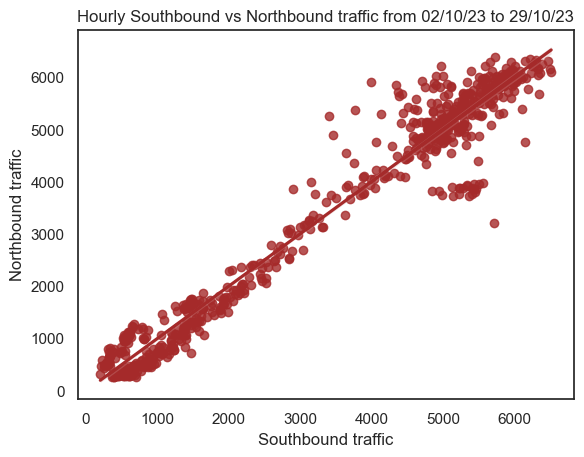

In [108]:
sns.regplot(x='southbound', y='northbound', data = df, color = 'brown')

plt.xlabel('Southbound traffic')
plt.ylabel('Northbound traffic')
plt.title('Hourly Southbound vs Northbound traffic from 02/10/23 to 29/10/23')

plt.savefig('corr_southbound_northbound.png')
plt.show()


#### Correlations between traffic levels and Air Temperature ####

I was curious to test what relationship might exist between the weather and traffic levels. To test this, I obtained hourly weather information for the nearby Phoenix Park weather station for the month of October. 

I had initially hoped to test the relationship of rain levels to traffic, as I know from experience that driving on the m50 in heavy rainy is something that I would avoid if possible. However, I found that  most hours did not have any rainfall associated with them, and this meant it would be harder to draw a conclusion about the impact of rainfall on traffic levels. Instead, I decided to test the correlation between temperature levels (in degrees Celsisus) and traffic levels. 

In [109]:
corr_s_temp = np.corrcoef(df['southbound'], df['temp'])[0,1]

corr_n_temp = np.corrcoef(df['northbound'], df['temp'])[0,1]

print(round(corr_s_temp, 3))
print(round(corr_n_temp, 3))

0.336
0.34


Here we find a weak positive correlation between local air temperature and road traffic levels of around 0.34 for both directions. While correlation does not imply causation, it is conceivable to me that, all else being equal, when the weather is more pleasant (in an October context, this might mean less cold than usual), people might be more inclined to leave the house and use the M50, especially on a weekend day when fewer people need to drive to work and the decision to drive is optional.

We can also plot scatterplots of air temperature against southbound and northbound traffic:

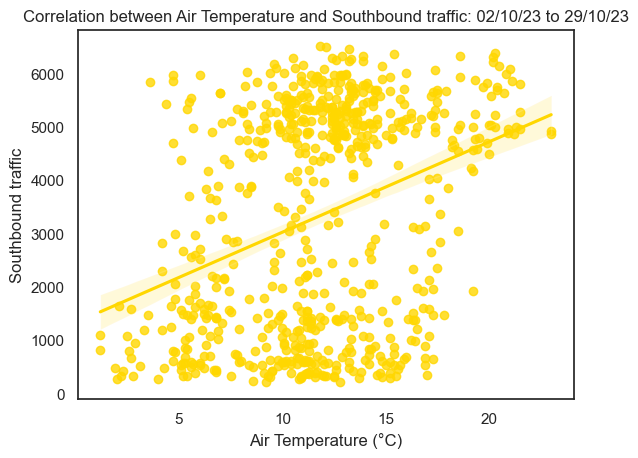

In [110]:
sns.set_theme(style = "white")
sns.set_palette("bright") 

sns.regplot(x='temp', y='southbound', data = df, color = 'gold')

plt.xlabel('Air Temperature (°C)')
plt.ylabel('Southbound traffic')
plt.title('Correlation between Air Temperature and Southbound traffic: 02/10/23 to 29/10/23')

plt.savefig('corr_temp_southbound.png')
plt.show()

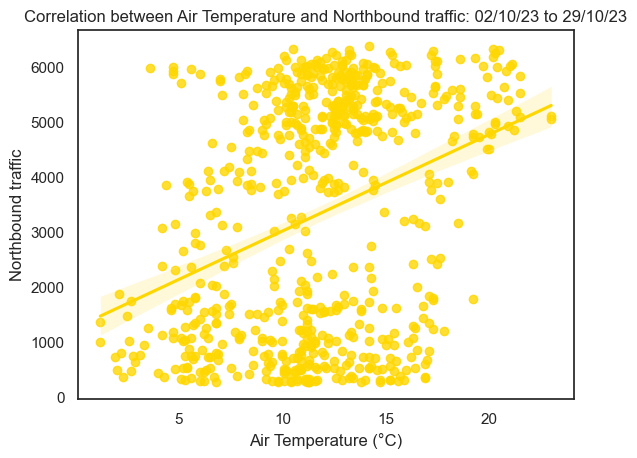

In [111]:
sns.regplot(x='temp', y='northbound', data = df, color = 'gold')

plt.xlabel('Air Temperature (°C)')
plt.ylabel('Northbound traffic')
plt.title('Correlation between Air Temperature and Northbound traffic: 02/10/23 to 29/10/23')

plt.savefig('corr_temp_northbound.png')
plt.show()

We can test further to see if the correlation of air temperature with traffic differs according to whether it is a weekday or weekend:

In [112]:
corr_s_weekday_temp = np.corrcoef(weekday['southbound'], weekday['temp'])[0,1]
corr_n_weekday_temp = np.corrcoef(weekday['northbound'], weekday['temp'])[0,1]

corr_s_weekend_temp = np.corrcoef(weekend['northbound'], weekend['temp'])[0,1]
corr_n_weekend_temp = np.corrcoef(weekend['southbound'], weekend['temp'])[0,1]

print(f'The Pearson correlation coefficients between traffic and air temperature by direction and day type are as follows:')
print()
print(f'Weekday Southbound traffic and air temperature: {round(corr_s_weekday_temp, 3)}')
print(f'Weekday Northbound traffic and air temperature: {round(corr_n_weekday_temp, 3)}')
print()
print(f'Weekend Southbound traffic and air temperature: {round(corr_s_weekend_temp, 3)}')
print(f'Weekend Northbound traffic and air temperature: {round(corr_n_weekend_temp, 3)}')


The Pearson correlation coefficients between traffic and air temperature by direction and day type are as follows:

Weekday Southbound traffic and air temperature: 0.257
Weekday Northbound traffic and air temperature: 0.271

Weekend Southbound traffic and air temperature: 0.438
Weekend Northbound traffic and air temperature: 0.448


These figures indicate that the correlation between air temperature and traffic volumes are higher on the weekend; this is a satisfying result, since it is in agreement with the idea that when people have less of a choice over whether or not they must leave the house (ie. when they need to travel to work on weekdays), unpleasant weather is less likely to impact on their decision to drive.


#### Regression equation ####
The **regression equations** for the relationship between air temperature and traffic levels can be created using scipy.stats and the linregress function:

In [113]:
reg_temp_s = ss.linregress(df['temp'], df['southbound']) 

reg_temp_n = ss.linregress(df['temp'], df['northbound']) 

print(reg_temp_s)
print(reg_temp_n)


LinregressResult(slope=169.75979767488016, intercept=1325.6645865477444, rvalue=0.3363766699193965, pvalue=3.0684322257273363e-19, stderr=18.361021797109604, intercept_stderr=228.27669804614854)
LinregressResult(slope=176.21163317212788, intercept=1249.9498510568005, rvalue=0.34007356244694875, pvalue=1.1788388919137938e-19, stderr=18.825060791911735, intercept_stderr=234.04594611243863)


The general form of a regression equation is y = mx + c, where m is the slope and x is the intercept of the regression line with the y-axis.

In this case, the regression equation predicting the number of vehicles travelling southbound, y, given the temperature in degrees celsisus, x, is approximately:

    y = 169.76x + 1352.66 

The equation to predict the number of cars travelling northbound, given the temperature, is:

    y = 176.21x + 1249.95

#### Side-by-side comparison of distributions ####
To examine the relationships between 'temp' and 'southbound' variables for a sample day (Monday Week 1), we can create a plot with two y-axes:

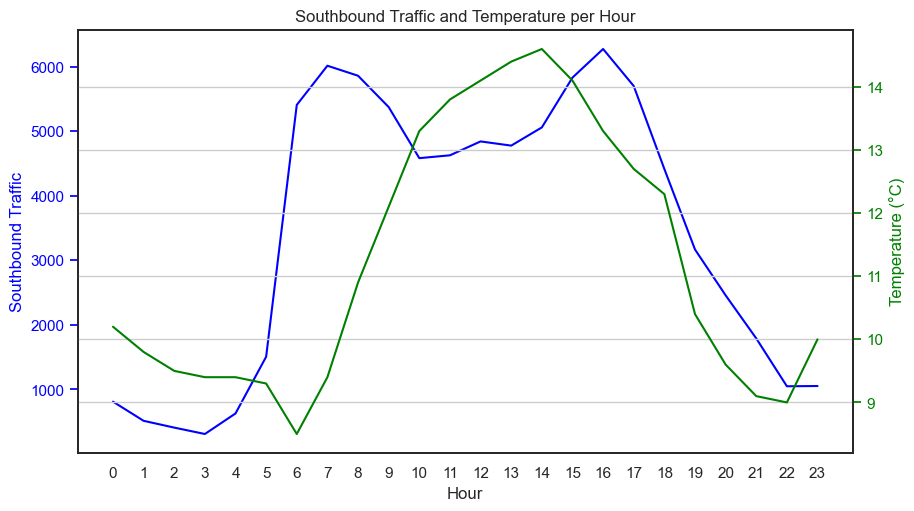

In [114]:
# this creates a plot capable of displaying more than one subplot
# https://python-graph-gallery.com/line-chart-dual-y-axis-with-matplotlib/#:~:text=It%20uses%20ax.,Y%20axis%20on%20this%20twin.

fig, ax1 = plt.subplots(figsize=(10, 5.5))

# This creates a second y-axis which shares the same x-axis as the first y-axis
ax2 = ax1.twinx()

# Plot for southbound traffic on the primary y-axis
ax1.plot(monday_wk1['hour'], monday_wk1['southbound'], color='blue', label='Southbound Mon Wk 1')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Southbound Traffic', color='blue')
ax1.tick_params(axis='y', colors='blue')   

# Plot for temperature on secondary y-axis
ax2.plot(monday_wk1['hour'], monday_wk1['temp'], color='green', label='Temperature Mon Wk 1')
ax2.set_ylabel('Temperature (°C)', color='green')
ax2.tick_params(axis='y', colors='green')

plt.title('Southbound Traffic and Temperature per Hour')
plt.xticks(np.arange(24))   
plt.grid(True)    # This plots a grid which makes it easier to compare both sets of data
plt.savefig('example_southbound_temp_hourly_overlap.png')
plt.show()

### Synthesising datasets ###

#### Synthetic datasets of traffic data ####

To create synthetic datasets of traffic data for **one day**, I will use the mean and standard deviations for the hourly Southbound and Northbound data obtained above for **weekdays** and **weekends** and use np.random to create plausable sets of datapoints for a weekday and a weekend day. The reason I want to create seperate datasets for weekdays and weekends is that I found the distributions of traffic to be quite different depending on this variable (day_type). A hypothetical weeks worth of synthetic data could be generated by running the code for weekday data five times and the cody for weekend data twice, and compiling the output.

I will then compare the distributions and properties of the synthetic datasets to the distributions obtained for the real weekday and weekend data from Week 1 to Week 4.

I will firstly create synthetic hourly data for **Southbound traffic** on a **weekday**: 

In [115]:
# To begin, I will generate a list of twenty-four normally distributed random numbers, each representing synthetic data for one hour:
# the loc and scale are the datapoints for mean and standard deviation of the weekday southbound hourly data calculated earlier:
synth_weekday_s_hourly = np.random.normal(loc=mean_weekday_s_hourly, scale=std_weekday_s_hourly, size=24)

# print(synth_weekday_s_hourly)

# Next, I will create a new dataframe containing the synthetic data, including in it a column for the 24 hours, 
# synthetic southbound traffic data, and day_type, which is 'weekday' here. I will us pd.DataFrame() to do this.

df_synth_weekday_s_hourly = pd.DataFrame({'hour': range(24), 'southbound': synth_weekday_s_hourly, 'day_type': 'weekday'})

# Next I can add an additional column to this dataframe which includes additional noise on top of the first set of synthetic data.
# we can adjust the amount of noise added to this column by altering the value of the 'noise' parameter:

# Since the lowest figure for traffic for mean average Southbound traffic is 317.10 (occuring at 3 am), I do not want to have a
# noise paramter which could bring the figure beneath zero for the 3 am hour, which could happen if the non-noisy datapoint was
# particularly distant from its mean and then additional noise made it even smaller. To be conservative, I will use a figure of 200 vehicles.
noise = 200     

df_synth_weekday_s_hourly['southbound_with_noise'] = df_synth_weekday_s_hourly['southbound'] + np.random.normal(loc=0, scale=noise, size=24)

print('Synthetic Dataset for Southbound Traffic on Weekdays:')
print()
print(df_synth_weekday_s_hourly)


Synthetic Dataset for Southbound Traffic on Weekdays:

    hour   southbound day_type  southbound_with_noise
0      0   799.075219  weekday            1003.386007
1      1   475.335528  weekday             317.324755
2      2   412.718146  weekday             282.364536
3      3   317.476842  weekday             515.906751
4      4   569.059527  weekday             599.859902
5      5  1582.259725  weekday            1376.054123
6      6  5290.548039  weekday            5103.645762
7      7  5891.443057  weekday            5985.084802
8      8  6155.333668  weekday            5928.823703
9      9  4866.069103  weekday            5056.488906
10    10  4260.559729  weekday            4454.216058
11    11  4728.072994  weekday            4852.925184
12    12  5244.534315  weekday            5020.279183
13    13  6306.541545  weekday            6487.369232
14    14  4814.746456  weekday            4905.770640
15    15  6175.332602  weekday            5952.595453
16    16  5146.361850  week

I can now plot the two synthetic datasets for Weekday Southbound traffic side by side to examine the impact of the added noise:

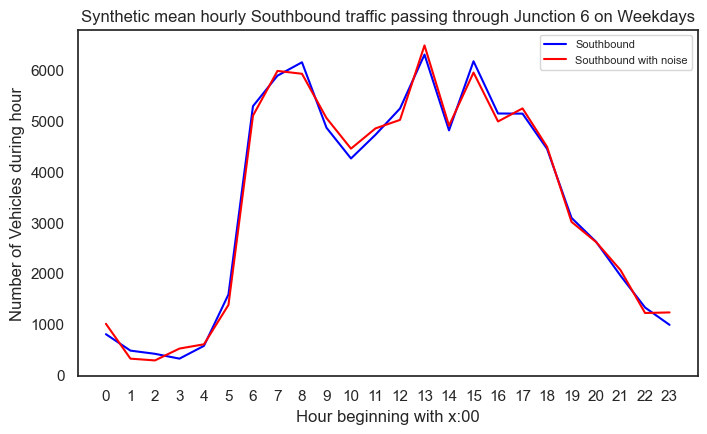

In [116]:
plt.figure(figsize=(8,4.5))
plt.plot(df_synth_weekday_s_hourly['southbound'], label = 'Southbound', color = 'blue')
plt.plot(df_synth_weekday_s_hourly['southbound_with_noise'], label = 'Southbound with noise', color = 'red')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Synthetic mean hourly Southbound traffic passing through Junction 6 on Weekdays')
plt.legend(["Southbound", "Southbound with noise"], loc ="upper right", prop={'size': 8})       # adjust size of legend
plt.savefig('synthetic_mean_weekday_s.png')
plt.show()

Next I create and plot the same two sets of data for **Weekday Northbound traffic**:

Synthetic Dataset for Northbound Traffic on Weekdays:

    hour   northbound day_type  northbound_with_noise
0      0   503.836413  weekday             612.781035
1      1   338.464988  weekday             307.066590
2      2   245.280257  weekday             629.604088
3      3   532.646711  weekday             583.842821
4      4   944.686264  weekday            1035.671994
5      5  1710.550604  weekday            1760.851784
6      6  3830.683381  weekday            3705.473921
7      7  5902.703393  weekday            5555.952784
8      8  5746.235637  weekday            6085.461335
9      9  5431.598078  weekday            5218.570359
10    10  5312.653270  weekday            5548.289551
11    11  4279.641484  weekday            4185.788409
12    12  5676.632495  weekday            5409.577877
13    13  5238.836981  weekday            5076.025240
14    14  5866.744223  weekday            5877.507476
15    15  5770.043283  weekday            5685.541434
16    16  4992.010839  week

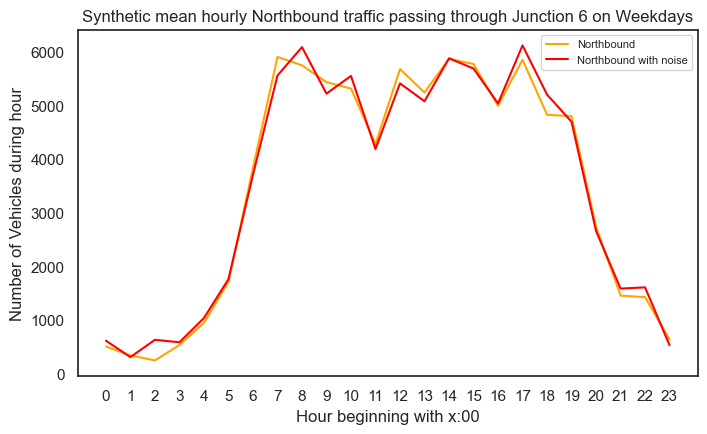

In [117]:
synth_weekday_n_hourly = np.random.normal(loc=mean_weekday_n_hourly, scale=std_weekday_n_hourly, size=24)

df_synth_weekday_n_hourly = pd.DataFrame({'hour': range(24), 'northbound': synth_weekday_n_hourly, 'day_type': 'weekday'})

noise = 200
df_synth_weekday_n_hourly['northbound_with_noise'] = df_synth_weekday_n_hourly['northbound'] + np.random.normal(loc=0, scale=noise, size=24)

print('Synthetic Dataset for Northbound Traffic on Weekdays:')
print()
print(df_synth_weekday_n_hourly)

plt.figure(figsize=(8,4.5))
plt.plot(df_synth_weekday_n_hourly['northbound'], label = 'Northbound', color = "orange")
plt.plot(df_synth_weekday_n_hourly['northbound_with_noise'], label = 'Northbound with noise', color = 'red')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Synthetic mean hourly Northbound traffic passing through Junction 6 on Weekdays')
plt.legend(["Northbound", "Northbound with noise"], loc ="upper right", prop={'size': 8})
plt.savefig('synthetic_mean_weekday_n.png')
plt.show()

The corresponding datasets and plots for the **Weekend Southbound** and **Weekend Northbound** traffic data are created below using similar code:

Synthetic Dataset for Southbound Traffic on Weekends:

    hour   southbound day_type  southbound_with_noise
0      0  1116.213651  weekend             801.514229
1      1   933.261160  weekend             914.531833
2      2   590.386337  weekend             710.644634
3      3   225.984886  weekend             -58.042738
4      4   508.239044  weekend             321.818411
5      5   329.245442  weekend             356.783069
6      6   891.670431  weekend             679.708559
7      7  1415.485597  weekend            1584.750668
8      8  1776.363424  weekend            1549.195613
9      9  3814.761657  weekend            3756.736980
10    10  4238.628298  weekend            4049.205090
11    11  4887.097727  weekend            4968.720389
12    12  5668.782722  weekend            5650.932968
13    13  5336.171075  weekend            5376.378298
14    14  5409.881330  weekend            5500.148874
15    15  5254.085903  weekend            5075.154580
16    16  5018.494328  week

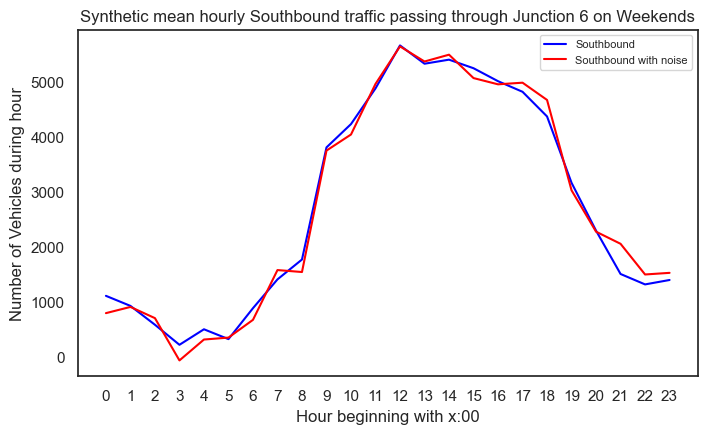

In [118]:
synth_weekend_s_hourly = np.random.normal(loc=mean_weekend_s_hourly, scale=std_weekend_s_hourly, size=24)

df_synth_weekend_s_hourly = pd.DataFrame({'hour': range(24), 'southbound': synth_weekend_s_hourly, 'day_type': 'weekend'})

noise = 200  
# for weekend traffic, a noise factor of 200 vehicles can sometimes lead to a minus figure for average number of vehicles
# for the early hours of the morning.
# I want to retain this level of noise, however, since reducing it will reduce the impact of noise elsewhere in the dataset and make
# it too similar to the non-noisy dataset

df_synth_weekend_s_hourly['southbound_with_noise'] = df_synth_weekend_s_hourly['southbound'] + np.random.normal(loc=0, scale=noise, size=24)

print('Synthetic Dataset for Southbound Traffic on Weekends:')
print()
print(df_synth_weekend_s_hourly)

plt.figure(figsize=(8,4.5))
plt.plot(df_synth_weekend_s_hourly['southbound'], label = 'Southbound', color = 'blue')
plt.plot(df_synth_weekend_s_hourly['southbound_with_noise'], label = 'Southbound with noise', color = 'red')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Synthetic mean hourly Southbound traffic passing through Junction 6 on Weekends')
plt.legend(["Southbound", "Southbound with noise"], loc ="upper right", prop={'size': 8})
plt.savefig('synthetic_mean_weekend_s.png')
plt.show()

Synthetic Dataset for Northbound Traffic on Weekends:

    hour   northbound day_type  northbound_with_noise
0      0   680.942817  weekend             527.845885
1      1   591.260132  weekend             533.726207
2      2   392.727960  weekend             499.290472
3      3   531.309646  weekend             589.363393
4      4   855.777477  weekend             901.124163
5      5  1053.145471  weekend             979.042797
6      6  1225.748037  weekend            1292.350462
7      7  1311.725524  weekend             874.813283
8      8  1568.823055  weekend            1537.379049
9      9  3238.110571  weekend            3416.195974
10    10  4571.878181  weekend            4376.179614
11    11  4779.630408  weekend            4651.172955
12    12  4962.428124  weekend            5057.447952
13    13  6030.497678  weekend            6241.874048
14    14  5676.426335  weekend            5454.189757
15    15  5025.321157  weekend            5278.020712
16    16  4683.842711  week

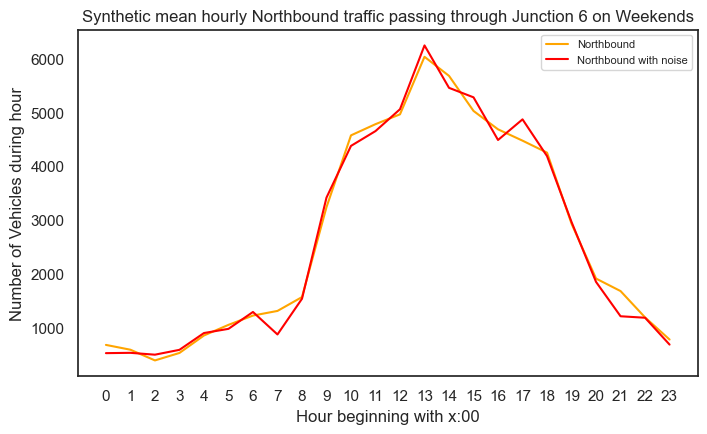

In [119]:
synth_weekend_n_hourly = np.random.normal(loc=mean_weekend_n_hourly, scale=std_weekend_n_hourly, size=24)

df_synth_weekend_n_hourly = pd.DataFrame({'hour': range(24), 'northbound': synth_weekend_n_hourly, 'day_type': 'weekend'})

noise = 200
df_synth_weekend_n_hourly['northbound_with_noise'] = df_synth_weekend_n_hourly['northbound'] + np.random.normal(loc=0, scale=noise, size=24)

print('Synthetic Dataset for Northbound Traffic on Weekends:')
print()
print(df_synth_weekend_n_hourly)

plt.figure(figsize=(8,4.5))
plt.plot(df_synth_weekend_n_hourly['northbound'], label = 'Northbound', color = 'orange')
plt.plot(df_synth_weekend_n_hourly['northbound_with_noise'], label = 'Northbound with noise', color = 'red')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Synthetic mean hourly Northbound traffic passing through Junction 6 on Weekends')
plt.legend(["Northbound", "Northbound with noise"], loc ="upper right", prop={'size': 8})
plt.savefig('synthetic_mean_weekend_n.png')
plt.show()

#### Synthetic dataset of air temperature data ####

As there ought not to be a meaningful correlation between average hourly air temperature and the day of the week, we can create our synthetic dataset for air temperature using the dataset for mean_hourly_temp and the figures for standard deviation for air temperature from earlier. Since this synthetic data was created from temperature data from the Phoenix Park between 02/10/2023 and 29/10/2023, it might be considered a plausable dataset of air temperature for a day in October in the North Dublin region.

Synthetic Dataset for Mean Air Temperature:

    hour       temp  temp_with_noise
0      0  13.963336        11.760294
1      1   9.301010         9.437148
2      2   1.604439         2.879693
3      3   3.320786         4.583783
4      4   7.974141         9.077551
5      5   6.872246         6.310912
6      6   7.120479         8.094052
7      7  17.644423        18.643198
8      8   9.800610         8.115207
9      9  11.197348        10.669841
10    10  15.599254        17.703791
11    11  14.715456        14.483301
12    12  13.987435        13.747886
13    13  19.040839        21.421250
14    14  14.900550        14.775354
15    15  10.134944        11.461030
16    16  14.311061        13.407378
17    17  15.544615        16.459680
18    18  17.674231        15.662618
19    19  11.859924         9.646248
20    20  12.309359        10.537852
21    21  14.728811        14.699836
22    22  17.200295        18.951943
23    23  11.517644        12.315159


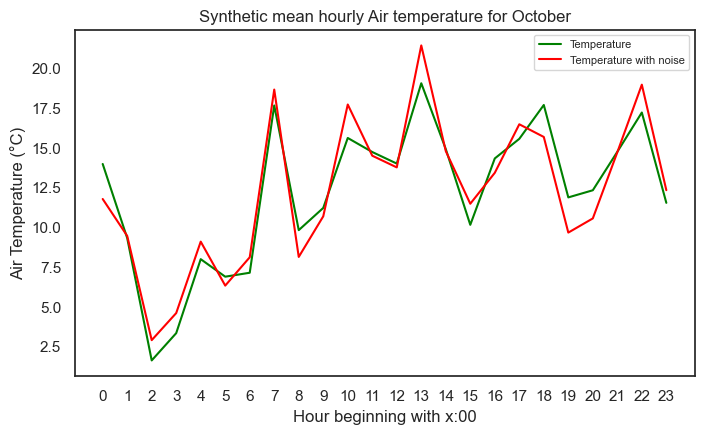

In [120]:
synth_hourly_temp = np.random.normal(loc=mean_hourly_temp, scale=std_hourly_temp, size=24)

df_synth_hourly_temp = pd.DataFrame({'hour': range(24), 'temp': synth_hourly_temp})

noise = 1.5
# Here I have added a noise factor of 1.5 degrees celsius, as the standard deviation for each hour is between 3 and 4 degrees, 
# so a further 1 degree of noise seems like a reasonable amount.
df_synth_hourly_temp['temp_with_noise'] = df_synth_hourly_temp['temp'] + np.random.normal(loc=0, scale=noise, size=24)

print('Synthetic Dataset for Mean Air Temperature:')
print()
print(df_synth_hourly_temp)

plt.figure(figsize=(8,4.5))
plt.plot(df_synth_hourly_temp['temp'], label = 'Temperature', color = 'green')
plt.plot(df_synth_hourly_temp['temp_with_noise'], label = 'Temperature with noise', color = 'red')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Air Temperature (°C)')
plt.title('Synthetic mean hourly Air temperature for October')
plt.legend(["Temperature", "Temperature with noise"], loc ="upper right", prop={'size': 8})
plt.savefig('synthetic_mean_hourly_temp.png')
plt.show()

These two synthetic datasets for air temperature seems "spikier" than the synthetic datasets for traffic, since a change of a few degrees in either direction over the course of an hour can represent a much larger shift on the plot than a change of a few hundred vehicles in either direction on the traffic plot.

I also believe that my model requires some refining; as things stand, the model allows for unrealistic swings in temperature over the course of a few hours. I imagine that the temperature at a given hour has a stronger correlation with the temperature of the preceding hour than the hour previous to that, with the importance of past temperature diminishing the further back you go; an improved model could account for this possibility. 

A sinusoidal model is also a possiblity, as I mentioned earlier, as temperature seems to fluctuate in a rythmic cycle from one day to the next.



#### Correlation and regression analyses of synthetic datasets ####

We can now analyse how traffic levels in each direction from the synthetic datasets correlate with one another, and how levels of traffic in each direction correlate with air temperature.

I will first test the correlation of synthetic Southbound and Northbound **traffic data** for **weekdays** (for both non-noisy and noisy datasets):

In [121]:
synth_corr_s_n_weekday = np.corrcoef(df_synth_weekday_s_hourly['southbound'], df_synth_weekday_n_hourly['northbound'])[0,1]
noisy_synth_corr_s_n_weekday = np.corrcoef(df_synth_weekday_s_hourly['southbound_with_noise'], df_synth_weekday_n_hourly['northbound_with_noise'])[0,1]

print(f'The Pearson correlation coefficient between a synthetic 24-hour dataset of Southbound and Northbound weekday traffic is {round(synth_corr_s_n_weekday, 3)}.')
print(f'The Pearson correlation coefficient between a noisy synthetic 24-hour dataset of Southbound and Northbound weekday traffic is {round(noisy_synth_corr_s_n_weekday, 3)}.')

The Pearson correlation coefficient between a synthetic 24-hour dataset of Southbound and Northbound weekday traffic is 0.952.
The Pearson correlation coefficient between a noisy synthetic 24-hour dataset of Southbound and Northbound weekday traffic is 0.943.


The correlations for the synthetic **weekend** traffic data are:

In [122]:
synth_corr_s_n_weekend = np.corrcoef(df_synth_weekend_s_hourly['southbound'], df_synth_weekend_n_hourly['northbound'])[0,1]
noisy_synth_corr_s_n_weekend = np.corrcoef(df_synth_weekend_s_hourly['southbound_with_noise'], df_synth_weekend_n_hourly['northbound_with_noise'])[0,1]

print(f'The Pearson correlation coefficient between a synthetic 24-hour dataset of Southbound and Northbound weekend traffic is {round(synth_corr_s_n_weekend, 3)}.')
print(f'The Pearson correlation coefficient between a noisy synthetic 24-hour dataset of Southbound and Northbound weekend traffic is {round(noisy_synth_corr_s_n_weekend, 3)}.')


The Pearson correlation coefficient between a synthetic 24-hour dataset of Southbound and Northbound weekend traffic is 0.98.
The Pearson correlation coefficient between a noisy synthetic 24-hour dataset of Southbound and Northbound weekend traffic is 0.969.


Having run the code a few times, I see the degree of correlation of the datasets changing each time; sometimes the weekday southbound and northbound data are more strongly correlated than the weekend, and vice versa. Regardless, the degree of correlation remains very close to one (perfect correlation) in all cases.

The correlations between synthetic **air temperature data** and synthetic **traffic data** are calculated below:

In [123]:
synth_corr_weekday_s_temp = np.corrcoef(df_synth_weekday_s_hourly['southbound'], df_synth_hourly_temp['temp'])[0,1]
noisy_synth_corr_weekday_s_temp = np.corrcoef(df_synth_weekday_s_hourly['southbound_with_noise'], df_synth_hourly_temp['temp_with_noise'])[0,1]

synth_corr_weekday_n_temp = np.corrcoef(df_synth_weekday_n_hourly['northbound'], df_synth_hourly_temp['temp'])[0,1]
noisy_synth_corr_weekday_n_temp = np.corrcoef(df_synth_weekday_n_hourly['northbound_with_noise'], df_synth_hourly_temp['temp_with_noise'])[0,1]

synth_corr_weekend_s_temp = np.corrcoef(df_synth_weekend_s_hourly['southbound'], df_synth_hourly_temp['temp'])[0,1]
noisy_synth_corr_weekend_s_temp = np.corrcoef(df_synth_weekend_s_hourly['southbound_with_noise'], df_synth_hourly_temp['temp_with_noise'])[0,1]

synth_corr_weekend_n_temp = np.corrcoef(df_synth_weekend_n_hourly['northbound'], df_synth_hourly_temp['temp'])[0,1]
noisy_synth_corr_weekend_n_temp = np.corrcoef(df_synth_weekend_n_hourly['northbound_with_noise'], df_synth_hourly_temp['temp_with_noise'])[0,1]

print(f'The Pearson correlation coefficient between a synthetic 24-hour dataset of weekday Southbound traffic and air temperature is {round(synth_corr_weekday_s_temp, 3)}.')
print(f'The Pearson correlation coefficient between a noisy synthetic 24-hour dataset of weekday Southbound traffic and air temperature is {round(noisy_synth_corr_weekday_s_temp, 3)}.')
print()
print(f'The Pearson correlation coefficient between a synthetic 24-hour dataset of weekday Northbound traffic and air temperature is {round(synth_corr_weekday_n_temp, 3)}.')
print(f'The Pearson correlation coefficient between a noisy synthetic 24-hour dataset of weekday Northbound traffic and air temperature is {round(noisy_synth_corr_weekday_n_temp, 3)}.')
print()
print(f'The Pearson correlation coefficient between a synthetic 24-hour dataset of weekend Southbound traffic and air temperature is {round(synth_corr_weekend_s_temp, 3)}.')
print(f'The Pearson correlation coefficient between a noisy synthetic 24-hour dataset of weekend Southbound traffic and air temperature is {round(noisy_synth_corr_weekend_s_temp, 3)}.')
print()
print(f'The Pearson correlation coefficient between a synthetic 24-hour dataset of weekend Northbound traffic and air temperature is {round(synth_corr_weekend_n_temp, 3)}.')
print(f'The Pearson correlation coefficient between a noisy synthetic 24-hour dataset of weekend Northbound traffic and air temperature is {round(noisy_synth_corr_weekend_n_temp, 3)}.')




The Pearson correlation coefficient between a synthetic 24-hour dataset of weekday Southbound traffic and air temperature is 0.491.
The Pearson correlation coefficient between a noisy synthetic 24-hour dataset of weekday Southbound traffic and air temperature is 0.509.

The Pearson correlation coefficient between a synthetic 24-hour dataset of weekday Northbound traffic and air temperature is 0.515.
The Pearson correlation coefficient between a noisy synthetic 24-hour dataset of weekday Northbound traffic and air temperature is 0.472.

The Pearson correlation coefficient between a synthetic 24-hour dataset of weekend Southbound traffic and air temperature is 0.59.
The Pearson correlation coefficient between a noisy synthetic 24-hour dataset of weekend Southbound traffic and air temperature is 0.598.

The Pearson correlation coefficient between a synthetic 24-hour dataset of weekend Northbound traffic and air temperature is 0.58.
The Pearson correlation coefficient between a noisy synth

Having ran the code multiple time, we find that, as was the case for the original dataset, there is a stronger correlation between weekend traffic levels and air temperature than there is with weekday traffic. That said, we can see huge variation in these values for correlation. It is worth remebering that the original dataset was the average over 28 days, so there is more data to work with to determine the nature of the real-world correlation relationship. With this synthetic dataset, I have only generated one day of data to work with; so if the figures for air temperature in the synthetic dataset deviate a lot from the real-world figures for average temperature measured over 28 days, the figures for the correlation coefficient are liable to deviate a lot also.

Below is an example of a regression plot for non-noisy synthetic weekday Southbound traffic plotted against temperature;

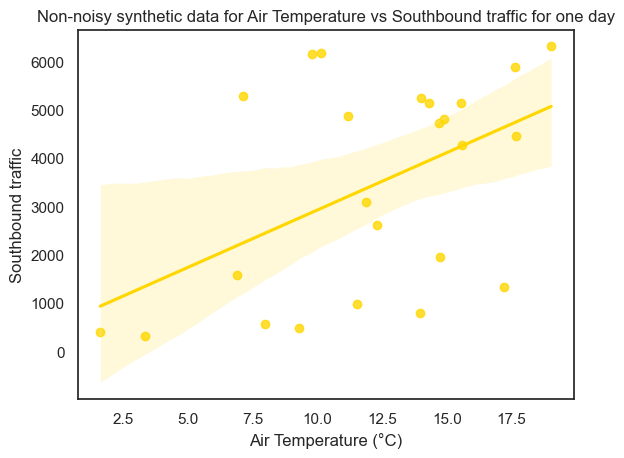

In [124]:
sns.set_theme(style = "white")
sns.set_palette("bright") 

sns.regplot(x = df_synth_hourly_temp['temp'], y = df_synth_weekday_s_hourly['southbound'], color = 'gold')

plt.xlabel('Air Temperature (°C)')
plt.ylabel('Southbound traffic')
plt.title('Non-noisy synthetic data for Air Temperature vs Southbound traffic for one day')

plt.savefig('synth_corr_temp_southbound_weekday.png')
plt.show()

and for noisy synthetic weekend Northbound traffic plotted against air temperature:

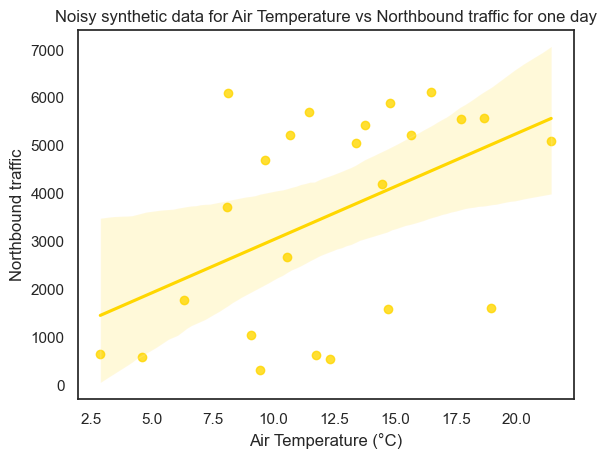

In [125]:
sns.set_theme(style = "white")
sns.set_palette("bright") 

sns.regplot(x = df_synth_hourly_temp['temp_with_noise'], y = df_synth_weekday_n_hourly['northbound_with_noise'], color = 'gold')

plt.xlabel('Air Temperature (°C)')
plt.ylabel('Northbound traffic')
plt.title('Noisy synthetic data for Air Temperature vs Northbound traffic for one day')

plt.savefig('noisy_synth_corr_temp_northbound_weekend.png')
plt.show()

The **regression equation** capturing the relationship between the synthetic air temperature and synthetic traffic datasets (non-noisy regressed against non-noisy, and noisy regressed against noisy) can be calculated using the code below:

In [126]:
synth_reg_temp_s = ss.linregress(df_synth_hourly_temp['temp'], df_synth_weekend_s_hourly['southbound']) 
noisy_synth_reg_temp_s = ss.linregress(df_synth_hourly_temp['temp_with_noise'], df_synth_weekend_s_hourly['southbound_with_noise']) 

synth_reg_temp_n = ss.linregress(df_synth_hourly_temp['temp'], df_synth_weekend_n_hourly['northbound']) 
noisy_synth_reg_temp_n = ss.linregress(df_synth_hourly_temp['temp_with_noise'], df_synth_weekend_n_hourly['northbound_with_noise']) 

print(synth_reg_temp_s)
print(noisy_synth_reg_temp_s) 

print(synth_reg_temp_n)
print(noisy_synth_reg_temp_n) 

LinregressResult(slope=256.2840457807602, intercept=-357.74292146147127, rvalue=0.5897606319629225, pvalue=0.0024203711851712526, stderr=74.82022127703938, intercept_stderr=969.3753583765198)
LinregressResult(slope=256.0200254009536, intercept=-383.34036786533625, rvalue=0.5975995912813608, pvalue=0.002044126199735164, stderr=73.23445957796116, intercept_stderr=959.4634560853639)
LinregressResult(slope=248.26666487068468, intercept=-340.5776092293927, rvalue=0.579914326557627, pvalue=0.0029749527398170777, stderr=74.35821155848721, intercept_stderr=963.3895322341908)
LinregressResult(slope=231.96466150738598, intercept=-197.6934297583166, rvalue=0.543906875014533, pvalue=0.0060073264740910575, stderr=76.29977413925488, intercept_stderr=999.6229290973382)


### Summary ###

During this project I have gained insight into how traffic levels are distributed on a heavily-used Irish Motorway. It was satisfying to decompose the dataset using the .loc[] and groupyby() functions and observe that the distributions of different portions of the dataset seemed to agree with what my experiences are using the motorway.

I was also impressed at the relatively high correlation I found between air temperature and traffic levels in both directions, especially on weekends, as I guess the correlation might be much lower.

I was also happy with the synthetic datasets I managed to create. It found it to be an engaging exercise to try to create datasets resembling the real world datasets I used; for example, deciding how much noise to include and creating a new dataframe with the desired columns. As my Python skills improve, I will hopefully refine my abilities at synthesising datasets, such as adding variable amounts of noise to different portions of the dataset, creating a larger dataset, or fitting a mathematical model to it. 

### References ###

**Background to Dataset:**

1.	(author/s unknown) (n.d) *Tabular Calendar*. Trafficdata.tii.ie. Retrieved 19th November 2023 from https://trafficdata.tii.ie/calendar_alt.asp?sgid=XZOA8M4LR27P0HAO3_SRSB&spid=130DE8EB2080 

2.	(author/s unknown) (n.d) *Phoenix Park Hourly Data*. Data.gov.ie. Retrieved 19th November 2023 from https://data.gov.ie/dataset/phoenix-park-hourly-data

3.	(author/s unknown) n.d. *HTML <img> Tag*. W3schools.com. Retrieved 2nd December 2023 from https://www.w3schools.com/tags/tag_img.asp


**Pre-analyses:**

4.	(author/s unknown) n/d. *Python Pandas - Categorical Data* Tutorialspoint.com. Retrieved 3rd December 2023 from https://www.tutorialspoint.com/python_pandas/python_pandas_categorical_data.htm

5.	(author/s unknown)(n.d). *Introductory*. Matplotlib.org. Retrieved 4th December 2023 from https://matplotlib.org/stable/tutorials/introductory/index.html 

6. 	(author/s unknown)(n.d). *NumPy: the absolute basics for beginners*. Numpy.org. Retrieved 4th December 2023 from https://numpy.org/doc/stable/user/absolute_beginners.html 

7.	(author/s unknown)(n.d). *Pandas Tutorial*. W3schools.com. Retrieved 4th December 2023 from https://www.w3schools.com/python/pandas/default.asp 

8.	(author/s unknown)(n.d). *seaborn: statistical data visualization*. Retrieved 4th December 2023 from https://seaborn.pydata.org/ 

9. (author/s unknown) n/d. *Statistical functions (scipy.stats)* docs.scipy.org. Retrieved 4th December 2023 from https://docs.scipy.org/doc/scipy/reference/stats.html


**Summary of variables in dataset:**

10.  (author/s unknown) n/d *pandas.DataFrame.dtypes* Pandas.pydata.org. Retrieved 3rd December 2023 from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html


**Distribution of Southbound and Northbound traffic data:**

11.	(“unutbu”) 26th September 2012. *Changing the tick frequency on the x or y axis*. Stackoverflow.com. Retrieved 2nd December 2023 from https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-the-x-or-y-axis

12.	(author/s unknown) (n.d) *Group by: split-apply-combine*. Pandas.pydata.org. Retrieved 2nd December 2023 from https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#splitting-an-object-into-groups

13.	(author/s unknown) (n.d) *Pandas DataFrame idxmax() Method*. w3schools.com. Retrieved 2nd December 2023 from https://www.w3schools.com/python/pandas/ref_df_idxmax.asp

14.	(“shardul_singh_tomar”) 12th April 2020. *Matplotlib.pyplot.legend() in Python* Geeksforgeeks.com. Retrieved 2nd December 2023 from https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/

15.	(“Hooked”) 27th March 2012. *Save plot to image file instead of displaying it* Stackoverflow.com. Retrieved 3rd December 2023 from https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it


**Distribution of Air Temperature data:**

16.	(Author/s unknown) n/d.*Sine Wave*. mathematicalmysteries.org. Retrieved 3rd December 2023 from https://mathematicalmysteries.files.wordpress.com/2021/11/sinewave.jpg?w=736

17.	(author/s unknown) n/d. *Sinusoidal*. Math.net. Retrieved 3rd December 2023 from https://www.math.net/sinusoidal


**Correlation and Regression analyses:**

18.	(author/s unknown) n/d. *Pearson correlation coefficient* Wikipedia.org. Retrieved 3rd December from https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

19.	(Ahsan Mahmood) 7th December 2016. *'Proper' rounding in Python, to 3 decimal places*. Stackoverflow.com. Retrieved 2nd December 2023 from https://stackoverflow.com/questions/41020797/proper-rounding-in-python-to-3-decimal-places

20.	(author/s unknown) n/d. *seaborn.regplot*Seaborn.pydata.org. Retrieved 3rd December 2023 from https://seaborn.pydata.org/generated/seaborn.regplot.html

21.	(Mirko Stojiljković) n/d. *Example: NumPy Correlation Calculation*. Realpython.com. Retrieved 2nd December 2023 from https://realpython.com/numpy-scipy-pandas-correlation-python/#example-numpy-correlation-calculation

22.	(“jonchar”) 8th December 2015. *Why do many examples use `fig, ax = plt.subplots()`*. Stackoverflow.com. Retrieved 2nd December 2023 from https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots

23.	(Yan Holtz) n/d. *Dual Y axis with Python and Matplotlib*. Python-graph-gallery.com. Retrieved 2nd December 2023 from https://python-graph-gallery.com/line-chart-dual-y-axis-with-matplotlib/#:~:text=It%20uses%20ax.,Y%20axis%20on%20this%20twin

24.	(Author/s unknown) n/d. *scipy.stats.linregress*.Retrieved 2nd December 2023 from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

25.	(“Logicmojo”) 18th May 2023. *Correlation coefficient*. Logicmojo.com. Retrieved 3rd December 2023 from https://logicmojo.com/assets/dist/new_pages/images/correlation-coefficient1.png21. 

26.	(author/s unknown) n/d. *matplotlib.axes.Axes.tick_params*. Matplotlib.org. Retrieved 2nd December 2023 from https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html

**Synthesising datasets:**

27.	(author/s unknown) n/d. *numpy.random.normal*. Numpy.org. Retrieved 2nd December 2023 from https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

28.	(“Yann”) 19th August 2011. *How to change legend fontsize with matplotlib.pyplot*. Stackoverflow.com. Retrieved 3rd December from https://stackoverflow.com/questions/7125009/how-to-change-legend-fontsize-with-matplotlib-pyplot
